# **Group assignment - The Olympics**

###### <b>Fanny Degerman, Delal Uca, Adrian Söderberg Skog och Patrik Hellgren<br>AIM25G<br>2025-11-26</b>

---

### **Part 0 - Warmup**

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
pd.set_option("display.max_colwidth", 20)

df = pd.read_csv("../athlete_events.csv", index_col=0)
display(df.head())
df.info()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's...,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra...,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's F...,NaN
4,Edgar Lindenau A...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's...,Gold
5,Christine Jacoba...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Wo...,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [181]:
# A
print(f"A total of {df["NOC"].nunique()} countries are represented in the dataset.")

A total of 230 countries are represented in the dataset.


In [182]:
# B
print(f"The following countries are represented:\n{', '.join(sorted(df["NOC"].unique()))}")

The following countries are represented:
AFG, AHO, ALB, ALG, AND, ANG, ANT, ANZ, ARG, ARM, ARU, ASA, AUS, AUT, AZE, BAH, BAN, BAR, BDI, BEL, BEN, BER, BHU, BIH, BIZ, BLR, BOH, BOL, BOT, BRA, BRN, BRU, BUL, BUR, CAF, CAM, CAN, CAY, CGO, CHA, CHI, CHN, CIV, CMR, COD, COK, COL, COM, CPV, CRC, CRO, CRT, CUB, CYP, CZE, DEN, DJI, DMA, DOM, ECU, EGY, ERI, ESA, ESP, EST, ETH, EUN, FIJ, FIN, FRA, FRG, FSM, GAB, GAM, GBR, GBS, GDR, GEO, GEQ, GER, GHA, GRE, GRN, GUA, GUI, GUM, GUY, HAI, HKG, HON, HUN, INA, IND, IOA, IRI, IRL, IRQ, ISL, ISR, ISV, ITA, IVB, JAM, JOR, JPN, KAZ, KEN, KGZ, KIR, KOR, KOS, KSA, KUW, LAO, LAT, LBA, LBR, LCA, LES, LIB, LIE, LTU, LUX, MAD, MAL, MAR, MAS, MAW, MDA, MDV, MEX, MGL, MHL, MKD, MLI, MLT, MNE, MON, MOZ, MRI, MTN, MYA, NAM, NBO, NCA, NED, NEP, NFL, NGR, NIG, NOR, NRU, NZL, OMA, PAK, PAN, PAR, PER, PHI, PLE, PLW, PNG, POL, POR, PRK, PUR, QAT, RHO, ROT, ROU, RSA, RUS, RWA, SAA, SAM, SCG, SEN, SEY, SGP, SKN, SLE, SLO, SMR, SOL, SOM, SRB, SRI, SSD, STP, SUD, SUI, SUR,

In [183]:
# C
print(f"The following sports are represented:\n{', '.join(sorted(df["Sport"].unique()))}")

The following sports are represented:
Aeronautics, Alpine Skiing, Alpinism, Archery, Art Competitions, Athletics, Badminton, Baseball, Basketball, Basque Pelota, Beach Volleyball, Biathlon, Bobsleigh, Boxing, Canoeing, Cricket, Croquet, Cross Country Skiing, Curling, Cycling, Diving, Equestrianism, Fencing, Figure Skating, Football, Freestyle Skiing, Golf, Gymnastics, Handball, Hockey, Ice Hockey, Jeu De Paume, Judo, Lacrosse, Luge, Military Ski Patrol, Modern Pentathlon, Motorboating, Nordic Combined, Polo, Racquets, Rhythmic Gymnastics, Roque, Rowing, Rugby, Rugby Sevens, Sailing, Shooting, Short Track Speed Skating, Skeleton, Ski Jumping, Snowboarding, Softball, Speed Skating, Swimming, Synchronized Swimming, Table Tennis, Taekwondo, Tennis, Trampolining, Triathlon, Tug-Of-War, Volleyball, Water Polo, Weightlifting, Wrestling


In [184]:
# D
print(f"It's possible to win {', '.join(df["Medal"].dropna().unique())} medals.")

It's possible to win Gold, Bronze, Silver medals.


In [185]:
# E
df["Age"].describe().loc[["mean", "50%", "min", "max", "std"]]

mean    25.556898
50%     24.000000
min     10.000000
max     97.000000
std      6.393561
Name: Age, dtype: float64

In [186]:
# F
## How many different athletes are represented in the dataset?
print(f"There are {df["Name"].dropna().nunique():,}".replace(","," ") + " different athletes in the dataset.\n")

## How many different men/women are represented in the dataset?
print(f"{df.groupby("Sex")["Name"].nunique()}\n")

## Where were the Winter Olympics held in 1988?
print(f"The 1988 Winter Olympics were held in {''.join(df.loc[(df["Year"] == 1988) & (df["Season"] == "Winter"), "City"].unique())}.\n")

## What is the name of every gold medal winner in Hungary during all these 120 years?
hun_gold = df.loc[(df["Medal"] == "Gold") & (df["NOC"] == "HUN"), ["Year", "Name"]].sort_values("Year")
print('\n'.join(f"{year} {name}" for year, name in zip(hun_gold["Year"], hun_gold["Name"])) + "\n")

## In which year did Hungary win the most gold medals?
hun_unique_sports = df.loc[(df["Medal"] == "Gold") & (df["NOC"] == "HUN"), ["Year", "Event"]].drop_duplicates()
hun_count = hun_unique_sports["Year"].value_counts()
print(f"In {hun_count.idxmax()} Hungary took {hun_count.max()} gold medals.")

There are 134 732 different athletes in the dataset.

Sex
F     33808
M    100979
Name: Name, dtype: int64

The 1988 Winter Olympics were held in Calgary.

1896 Alfrd (Arnold-) Hajs (Guttmann-)
1896 Alfrd (Arnold-) Hajs (Guttmann-)
1900 Rudolf (-Rezs) Bauer
1904 Zoltn Imre dn von Halmay
1904 Zoltn Imre dn von Halmay
1906 Gza Kiss (Drippei-, -Klein)
1906 Jzsef nody
1906 Henrik Hajs (Guttmann-)
1906 Zoltn Imre dn von Halmay
1906 Gyrgy Sztantics
1908 Jen Fuchs (-Fekete)
1908 Richrd Weisz (Vrtesi)
1908 Dezs Fldes
1908 Pter Tth
1908 Jen Fuchs (-Fekete)
1908 Oszkr Gerde
1908 Lajos Werkner
1912 Jen Fuchs (-Fekete)
1912 Lszl Berti (Berty)
1912 Ervin Mszros
1912 Dezs Fldes
1912 Lajos Werkner
1912 Sndor (Alexander) Prokopp
1912 Pter Tth
1912 Jen Fuchs (-Fekete)
1912 Zoltn Schenker (Ozoray)
1912 Oszkr Gerde
1924 Gyula Halasy
1924 Sndor Psta
1928 Gyula Glykais
1928 Ferenc Mez (Grnfeld-)
1928 Jnos Garay
1928 Attila Petschauer
1928 Jzsef Rdy
1928 Antal Kocsis
1928 Lajos Keresztes
1928 Sndor Gombos
1

<Axes: xlabel='Sex', ylabel='count'>

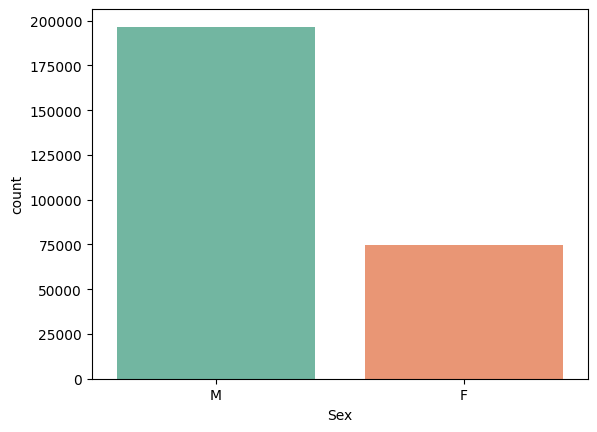

In [187]:
# G
sns.countplot(df, x="Sex", hue="Sex", palette="Set2")

In [188]:
# H
medals = df[["NOC", "Year", "Event", "Medal"]].dropna().drop_duplicates(subset=["NOC", "Year", "Event", "Medal"])
medals_per_NOC = medals.groupby("NOC")["Medal"].count().sort_values(ascending=False)
top10_NOC = medals_per_NOC[:10].reset_index()

fig = px.bar(data_frame=top10_NOC,
       x="NOC", 
       y="Medal", 
       labels={"NOC": "Countries", "Medal": "Number of medals"}, 
       title="Top 10 countries with most medals won",
       color="NOC")
fig.show()

In [189]:
# I: plotta gärna fler saker som är intressant


### **Part 1 - Country Statistics**

#### **1.1 Anonymizing names**

In [190]:
import hashlib as hl
pd.set_option("display.max_colwidth", 26)

hun_df = df.loc[df["NOC"] == "HUN"].copy().reset_index()
hash_df = hun_df["Name"].apply(lambda x: hl.sha256(x.encode()).hexdigest())
hun_df["Name"] = hash_df
display(hun_df.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,99,3d783a420a34bbe55508bb...,M,30.0,181.0,79.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",Silver
1,100,ed7fb6924e1b785bfd0d7d...,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 100 met...,NaN
2,100,ed7fb6924e1b785bfd0d7d...,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200...,Bronze
3,507,557f18d348e2fb24e10d9c...,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,Canoeing Men's Kayak D...,Bronze
4,507,557f18d348e2fb24e10d9c...,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,Canoeing Men's Kayak F...,Gold


#### **1.2 Analyzing Hungary Statistics**

##### **1.2.1 Medals won per sport**

In [191]:
most_medals = hun_df.groupby("Sport")["Medal"].value_counts().unstack(fill_value=0).sum(axis=1).sort_values(ascending=False)
most_medals_df = pd.DataFrame(most_medals, columns=["Medals"])

fig = px.bar(data_frame=most_medals_df,
       x=most_medals_df.index, 
       y="Medals", 
       title="Hungary: medals won per sport", 
       color=most_medals_df.index)
fig.show()

##### **1.2.2 Amount of medals per Olympics**

In [192]:
total_medals = hun_df[["Year", "Season", "Event", "Medal"]].dropna().drop_duplicates(subset=["Year", "Event", "Medal"])
total_medals["ExtraEvent"] = total_medals.apply(lambda row: "Middle-games" if row["Year"] == 1906 else ("Winter" if row["Season"] == "Winter" else "Summer"), axis=1)
unique_medals = total_medals.groupby(["Year", "ExtraEvent"])["Medal"].value_counts().unstack().sum(axis=1)
unique_medals_df = unique_medals.reset_index().rename(columns={0: "Medals"})

fig = px.bar(
       data_frame=unique_medals_df,
       x="Year", 
       y="Medals", 
       title="Hungary: medals won per Olympics", 
       subtitle="Team medals counts as one medal", 
       color="ExtraEvent", 
       barmode="group", 
       color_discrete_map={"Summer": "orange", "Winter": "blue", "Middle-games": "red"})
fig.update_layout(legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="right", x=1), legend_title_text="", bargap=0.02)
fig.update_xaxes(dtick=4, ticklabelposition="outside left", tickangle=-45)
fig.show()

In [193]:
# 1952 was Hungary's most successful year in the Olympics
new_df = df[["Name", "NOC", "Year", "Sport", "Event", "Medal"]]
hun_new_df = new_df[(new_df["NOC"] == "HUN") & (new_df["Year"] == 1952)].dropna().drop_duplicates(subset=["Event", "Medal"])
hun_1952 = pd.DataFrame(hun_new_df.groupby("Sport")["Medal"].value_counts().unstack().sum(axis=1)).rename(columns={0: "Medals"}).sort_values("Medals", ascending=False)

fig = px.bar(
       data_frame=hun_1952,
       x=hun_1952.index, 
       y="Medals", 
       title="Hungary: medals won per sport during the 1952 Olympics", 
       subtitle="Team medals count as one medal", 
       color=hun_1952.index)
fig.show()

In [194]:
# Showing Sweden's performance for comparison and to visualize the difference with separated Olympics from 1924.
swe_df = df.loc[df["NOC"] == "SWE"].copy().reset_index()

total_medals = swe_df[["Year", "Season", "Event", "Medal"]].dropna().drop_duplicates(subset=["Year", "Event", "Medal"])
unique_medals = total_medals.groupby(["Year", "Season"])["Medal"].value_counts().unstack().sum(axis=1)
unique_medals_df = pd.DataFrame(unique_medals.reset_index(level="Season")).rename(columns={0: "Medals"})

fig = px.bar(
       data_frame=unique_medals_df,
       x=unique_medals_df.index, 
       y="Medals", 
       title="Sweden: medals won per Olympics", 
       subtitle="Team medals counts as one medal", 
       color="Season", 
       barmode="group", 
       color_discrete_map={"Summer": "orange", "Winter": "blue"})
fig.update_layout(legend=dict(orientation="h"))
fig.update_xaxes(dtick=4, tickangle=45)
fig.show()

##### **1.2.3 Histogram of age**

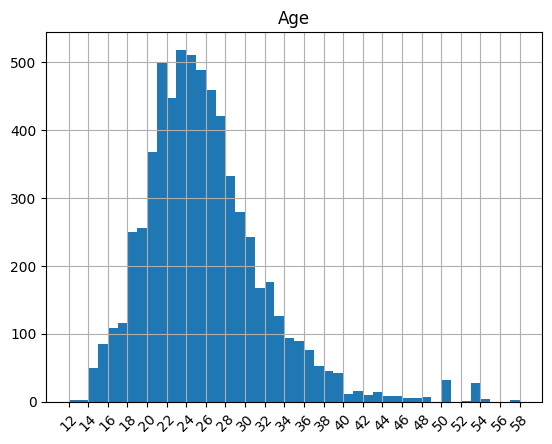

In [195]:
hun_df.hist("Age", bins=int(hun_df["Age"].max()-hun_df["Age"].min()))
plt.xticks(range(int(hun_df["Age"].min()), int(hun_df["Age"].max())+1, 2), rotation=45)
plt.show()

##### **1.2.4 Extras**

In [196]:
# Count medals won by Hungary and Sweden during the winter Olympics and compare
new_df = df[["NOC", "Year", "Event", "Season", "Medal"]]
winter_swehun = new_df.loc[(new_df["Season"] == "Winter") & (new_df["NOC"].isin(["HUN", "SWE"]))].copy().dropna(subset=["Medal"]).drop_duplicates(subset=["Medal", "Year", "Event"])
sum = winter_swehun.groupby("NOC")["Medal"].value_counts().unstack()
fig = px.bar(sum, 
       color_discrete_map={"Gold": "orange", "Silver": "grey", "Bronze": "sienna"}, 
       text_auto=True, 
       title="Total number of medals won during all winter Olympics", 
       subtitle="Team medals count as one medal",  
       width=600, 
       barmode="relative", 
       category_orders={"Medal": ["Bronze", "Silver", "Gold"]})
fig.update_layout(legend=dict(traceorder="reversed"))

In [ ]:
# Number of events that Hungarian athletes participated in
new_df = df[["Name", "Event", "NOC", "Year"]]
hun_df = new_df[new_df["NOC"] == "HUN"].dropna().drop_duplicates(subset=["Event", "Year"])
grouped_df = pd.DataFrame(hun_df.groupby("Year")["Event"].value_counts().unstack().sum(axis=1)).rename(columns={0:"Events"}).reset_index()

fig = px.line(grouped_df, 
        x="Year", 
        y="Events", 
        title="Number of events the Hungarian athletes participated in per year", 
        subtitle="Years: 1896-2016", 
        range_x=[1892, 2020], 
        range_y=[0, grouped_df["Events"].max()+15], 
        line_shape="spline")
fig.update_xaxes(dtick=4, ticklabelposition="outside left", tickangle=-45)
fig.update_traces(line_color="green")
fig.show()

### **Part 2 - Sports Statistics**

#### **2.1 Medal distribution between countries (Weightlifting)**

In [327]:
new_df = df[["Sport", "Medal", "NOC", "Year", "Event"]].dropna().drop_duplicates(subset=["Year", "Event", "Medal"])
weightlifting_df = new_df[new_df["Sport"].isin(["Weightlifting"])]
medals = weightlifting_df.groupby("NOC")["Medal"].value_counts().unstack().sum(axis=1).astype(int)

fig = px.bar(medals, 
             x=medals.index, 
             y=medals.values, 
             color=medals.index, 
             title="Medals won in Weightlifting", 
             subtitle="Between: 1896-2016", 
             labels={"NOC":"Countries", "y": "Medals"})
fig.update_xaxes(ticklabelposition="outside left", tickangle=-45, dtick=1, tickfont=dict(size=10))
fig.update_layout(showlegend=False)
fig.show()

#### **2.2 Age distribution in Weightlifting (over time)**

In [395]:
new_df = df[["Name", "Age", "Sport", "NOC", "Year"]].dropna().drop_duplicates(subset=["Name", "Age", "NOC"])
weightlifting_df = new_df[(new_df["Sport"].isin(["Weightlifting"]))]
grouped = weightlifting_df.groupby(["Sport", "Year"])["Age"].value_counts().reset_index().rename(columns={"count":"Athletes"})

fig = px.histogram(grouped, 
                   x="Age", 
                   y="Athletes", 
                   animation_frame="Year", 
                   nbins=60)
fig.update_xaxes(range=[grouped["Age"].min()-1, grouped["Age"].max()+1], dtick=1)
fig.update_yaxes(range=[0, grouped["Athletes"].max()+5])
fig.update_layout(yaxis_title="Number of Athletes")
fig.show()

#### **2.3 Extras**